# 描述

# MNIST

In [1]:
from sklearn.datasets import fetch_mldata

In [6]:
# mldata.org 无法访问
# 下载https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat
# 放到默认目录: ~/scikit_learn_data/mldata目录下
mnist = fetch_mldata(dataname='MNIST original') 

In [7]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [9]:
X, y = mnist['data'], mnist['target']

In [11]:
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

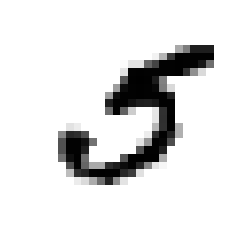

In [19]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
#plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show

In [20]:
y[36000]

5.0

In [22]:
# train, test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [23]:
# shuffle
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 训练一个二元分类器

In [24]:
# 数字5检测器

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [27]:
# SGD: 随机梯度下降
from sklearn.linear_model import SGDClassifier

In [26]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
# 预测
sgd_clf.predict([some_digit])

array([ True])

# 性能评估